In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV 
import pandas as pd

In [2]:
data=pd.read_csv('cancer_reg .csv')

In [3]:
data.shape

(3047, 34)

In [4]:
data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [5]:
data.drop(['binnedInc'],axis=1,inplace=True)
data.drop(['Geography'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  AvgHouseholdSize         3047 non-null   float64
 12  PercentMarried           3047 non-null   float64
 13  PctNoHS18_24             3047 non-null   float64
 14  PctHS18_24              

In [6]:
data.fillna(data.PctPrivateCoverageAlone.mode().values[0],inplace=True)
data.fillna(data.PctEmployed16_Over.mode().values[0],inplace=True)

In [8]:
import numpy as np

In [9]:
#perform log normalization
data['avgAnnCount']=np.log(data['avgAnnCount']+1)                
data['avgDeathsPerYear']=np.log(data['avgDeathsPerYear']+1)
#data['population']=np.log(data['population']+1)                               
data['incidenceRate ']=np.log(data['incidenceRate']+1 ) 
data['studyPerCap']=np.log(data['studyPerCap']+1)
data['MedianAge']=np.log(data['MedianAge']+1 ) 
data['BirthRate']=np.log(data['BirthRate']+1)
data['AvgHouseholdSize']=np.log(data['AvgHouseholdSize']+1)

In [ ]:
#x=data.drop('TARGET_deathRate',axis=1)
#y=data['TARGET_deathRate']

In [10]:
X = data.drop(["TARGET_deathRate"], axis = 1)
y = data["TARGET_deathRate"]


Optimal number of features: 21


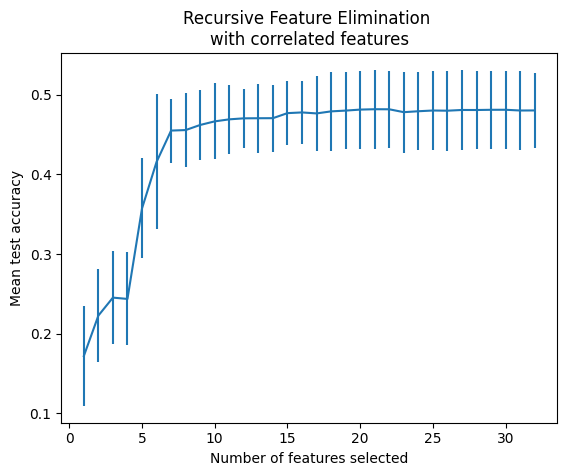

In [11]:
regressor = LinearRegression()
feature_selector = RFECV(regressor)

fit = feature_selector.fit(X,y)

optimal_feature_count = feature_selector.n_features_                         
print(f"Optimal number of features: {optimal_feature_count}")

n_scores = len(fit.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    fit.cv_results_["mean_test_score"],
    yerr=fit.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()


Optimal numer of features: 21
Index(['avgAnnCount', 'avgDeathsPerYear', 'povertyPercent', 'studyPerCap',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate', 'incidenceRate '],
      dtype='object')


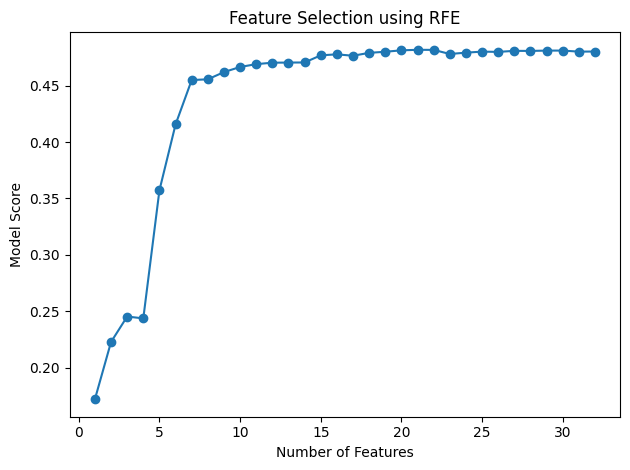

In [26]:
regressor = LinearRegression()
feature_selector = RFECV(regressor)

fit = feature_selector.fit(X,y)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal numer of features: {optimal_feature_count}")


X_new = X.loc[:, feature_selector.get_support()]
print(X_new.columns)
plt.plot(range(1, len(fit.cv_results_["mean_test_score"])+1), fit.cv_results_["mean_test_score"],marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title("Feature Selection using RFE")
plt.tight_layout() 
plt.show()